Customer Churn Analysis


Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 


You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 


Note: You can find the dataset in the link below.



Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

In [145]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns
import warnings

In [146]:
df=pd.read_csv("Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [148]:
for i in df:
    print(i,":",df[i].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

In [149]:
for i in df:
    print(i,":",df.loc[df[i]==" "])

customerID : Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
gender : Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
SeniorCitizen : Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharg

In [150]:
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [151]:
df.drop(index=[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754], inplace=True)
df.reset_index(inplace=True)
df.shape

(7032, 22)

In [152]:
for i in df:
    
    print('--------------------------------------')
    print(i,":",'\n',df[i].value_counts())
    print("---------------------------------------")
    print(i,":",df[i].dtypes)
    print("--------------------------------------")

--------------------------------------
index : 
 0       1
4692    1
4703    1
4702    1
4701    1
       ..
2345    1
2344    1
2343    1
2342    1
7042    1
Name: index, Length: 7032, dtype: int64
---------------------------------------
index : int64
--------------------------------------
--------------------------------------
customerID : 
 7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64
---------------------------------------
customerID : object
--------------------------------------
--------------------------------------
gender : 
 Male      3549
Female    3483
Name: gender, dtype: int64
---------------------------------------
gender : object
--------------------------------------
--------------------------------------
SeniorCitizen : 
 0    5890
1    1142
Name: SeniorCitizen, dtype: int64
---------------------

In [153]:
df['TotalCharges']=df['TotalCharges'].apply(np.float64)
df['TotalCharges'].dtypes

dtype('float64')

<AxesSubplot:>

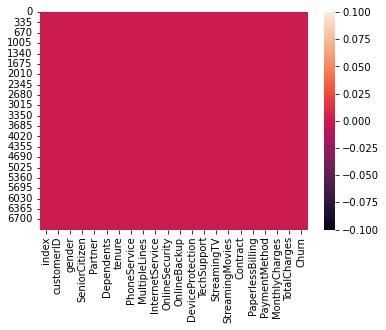

In [154]:
sns.heatmap(df.isnull())

In [155]:
for i in df:
    print(i,":",'\n',df.loc[df[i]=="-"])
    print("------------------------------------------------------------")

index : 
 Empty DataFrame
Columns: [index, customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 22 columns]
------------------------------------------------------------
customerID : 
 Empty DataFrame
Columns: [index, customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 22 columns]
------------------------------------------------------------
gender : 
 Empty DataFrame
Columns: [index, customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, Onlin

In [156]:
for i in df:
    print(i,":",'\n',df.loc[df[i]=="Nan"])
    print('---------------------------------------------------------------')
    print(i,':',df.loc[df[i]=="nan"])
    print(i,':',df.loc[df[i]=="null"])
    print(i,':',df.loc[df[i]=="Null"])
    print('----------------------------------------------------------------')
    print("-----------------------------------------------------------------")

index : 
 Empty DataFrame
Columns: [index, customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 22 columns]
---------------------------------------------------------------
index : Empty DataFrame
Columns: [index, customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 22 columns]
index : Empty DataFrame
Columns: [index, customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV,

In [157]:
df.drop(['index','customerID'],inplace=True,axis=1)

In [158]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [159]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


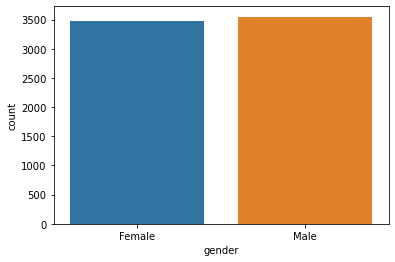

In [160]:
sns.countplot(df['gender'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


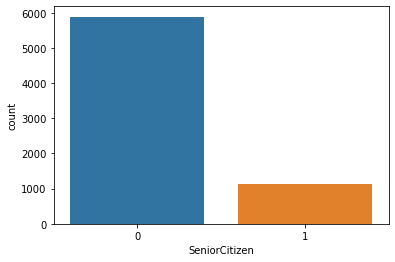

In [161]:
sns.countplot(df['SeniorCitizen'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


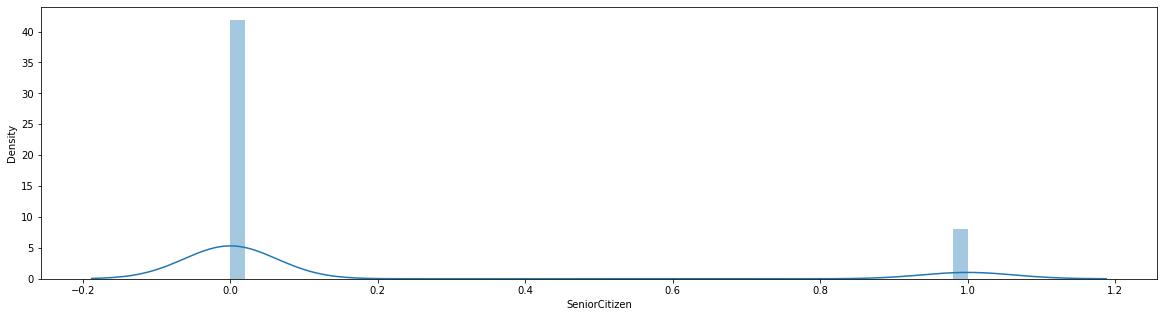

In [162]:
plt.figure(figsize=(20,5))
sns.distplot(df['SeniorCitizen'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


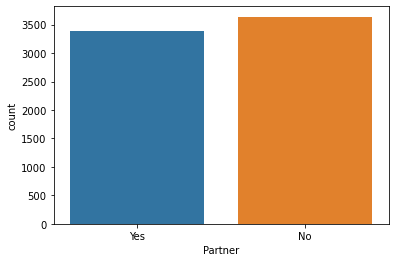

In [163]:
sns.countplot(df['Partner'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


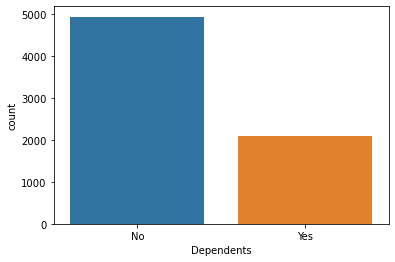

In [164]:
sns.countplot(df['Dependents'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


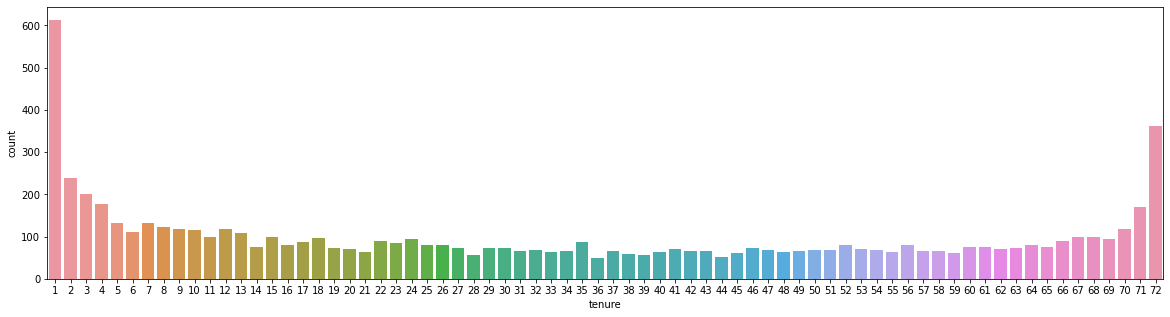

In [165]:
plt.figure(figsize=(20,5))
sns.countplot(df['tenure'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


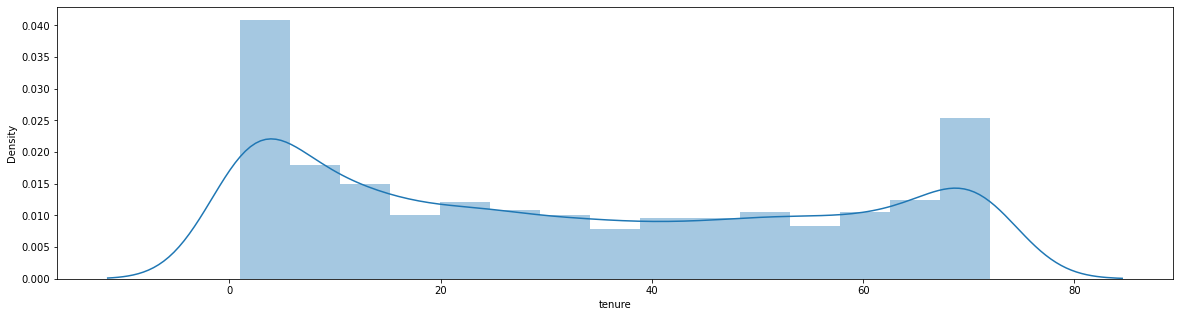

In [166]:
plt.figure(figsize=(20,5))
sns.distplot(df['tenure'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


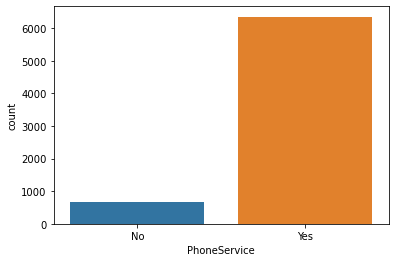

In [167]:
sns.countplot(df['PhoneService'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


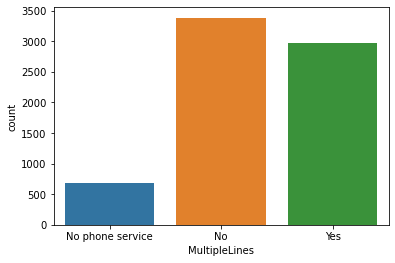

In [168]:
sns.countplot(df['MultipleLines'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


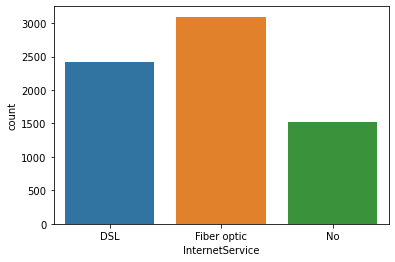

In [169]:
sns.countplot(df['InternetService'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


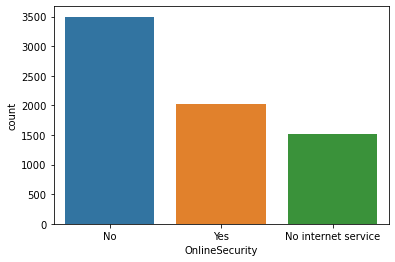

In [170]:
sns.countplot(df['OnlineSecurity'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


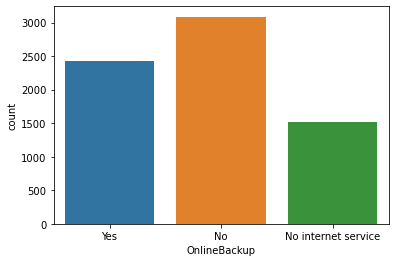

In [171]:
sns.countplot(df['OnlineBackup'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


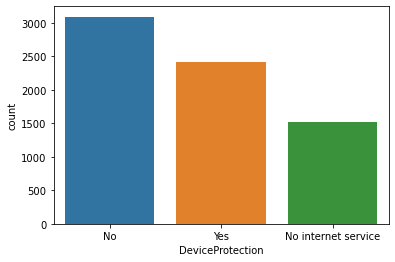

In [172]:
sns.countplot(df['DeviceProtection'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


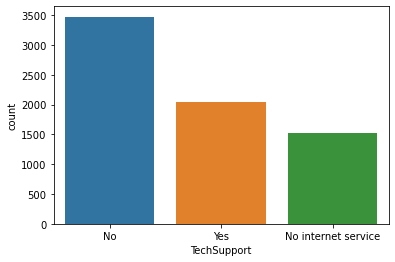

In [173]:
sns.countplot(df['TechSupport'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


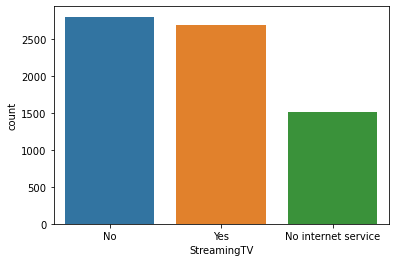

In [174]:
sns.countplot(df['StreamingTV'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


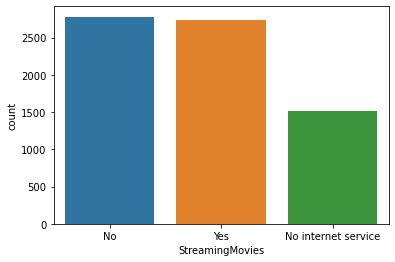

In [175]:
sns.countplot(df['StreamingMovies'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


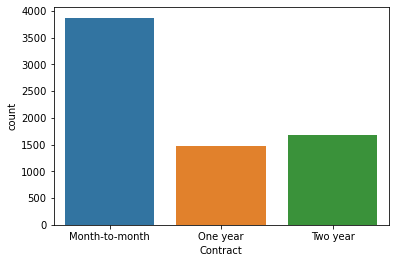

In [176]:
sns.countplot(df['Contract'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


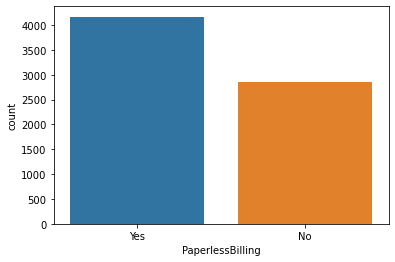

In [177]:
sns.countplot(df['PaperlessBilling'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


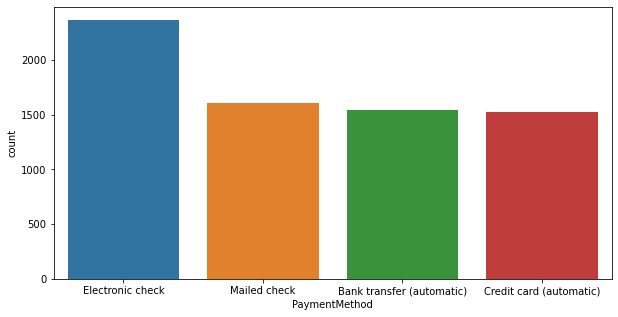

In [178]:
plt.figure(figsize=(10,5))
sns.countplot(df['PaymentMethod'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


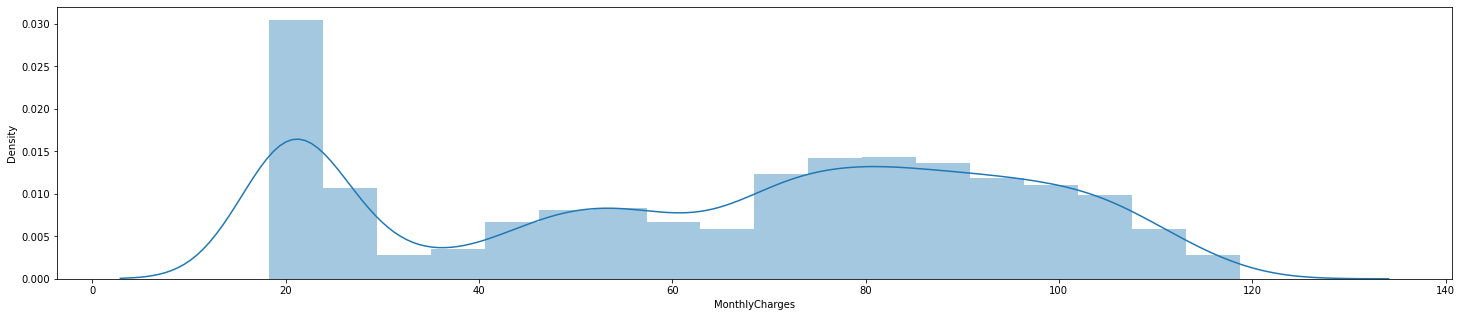

In [179]:
plt.figure(figsize=(25,5))
sns.distplot(df['MonthlyCharges'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


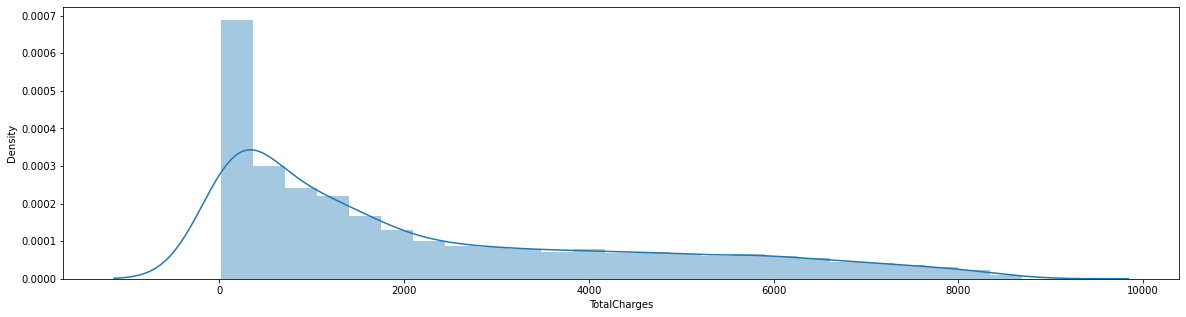

In [180]:
plt.figure(figsize=(20,5))
sns.distplot(df['TotalCharges'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


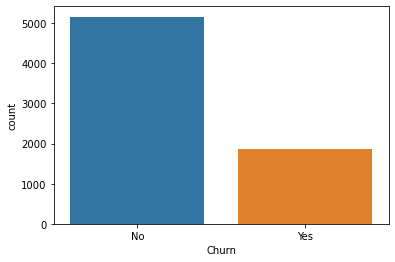

In [181]:
sns.countplot(df['Churn'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


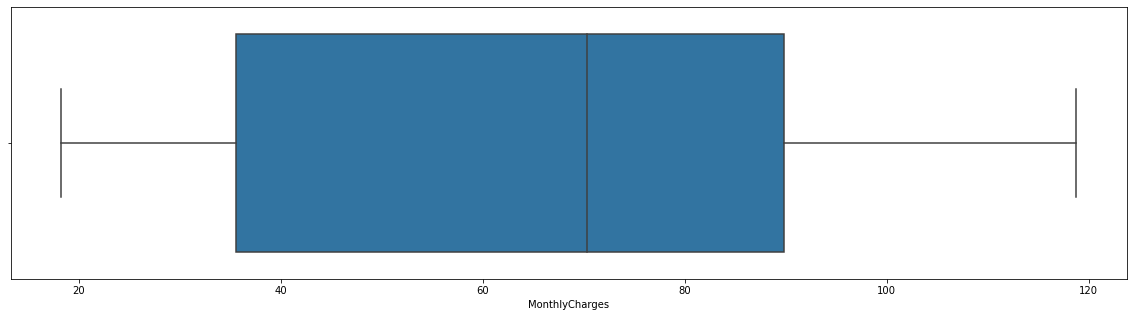

In [182]:
plt.figure(figsize=(20,5))
sns.boxplot(df['MonthlyCharges'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


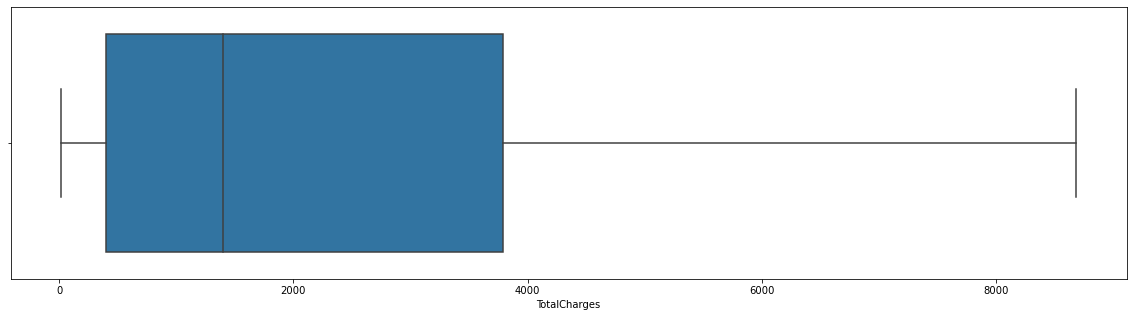

In [183]:
plt.figure(figsize=(20,5))
sns.boxplot(df['TotalCharges'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


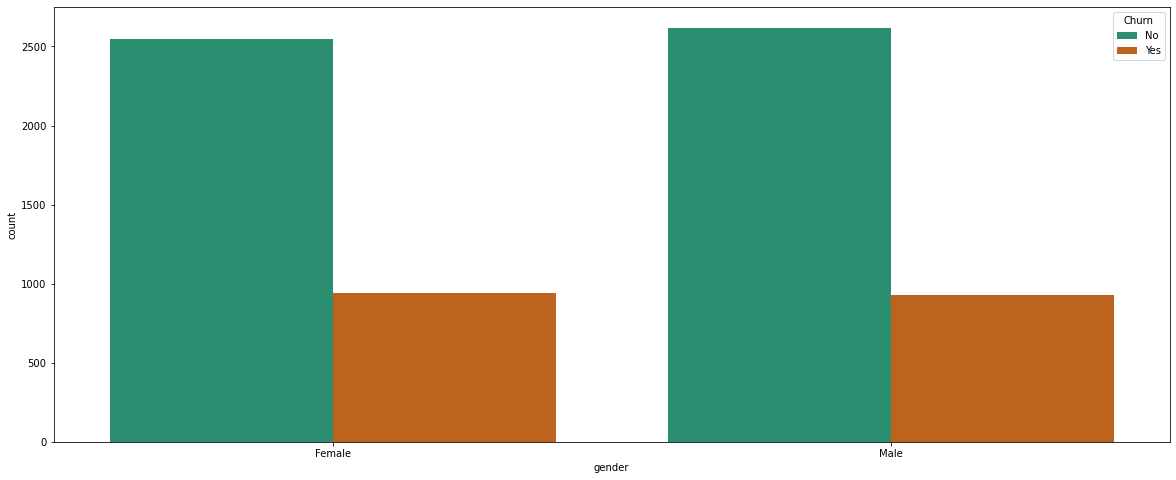

In [184]:
plt.figure(figsize=(20,8))
sns.countplot(df['gender'],hue=df['Churn'],palette='Dark2')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


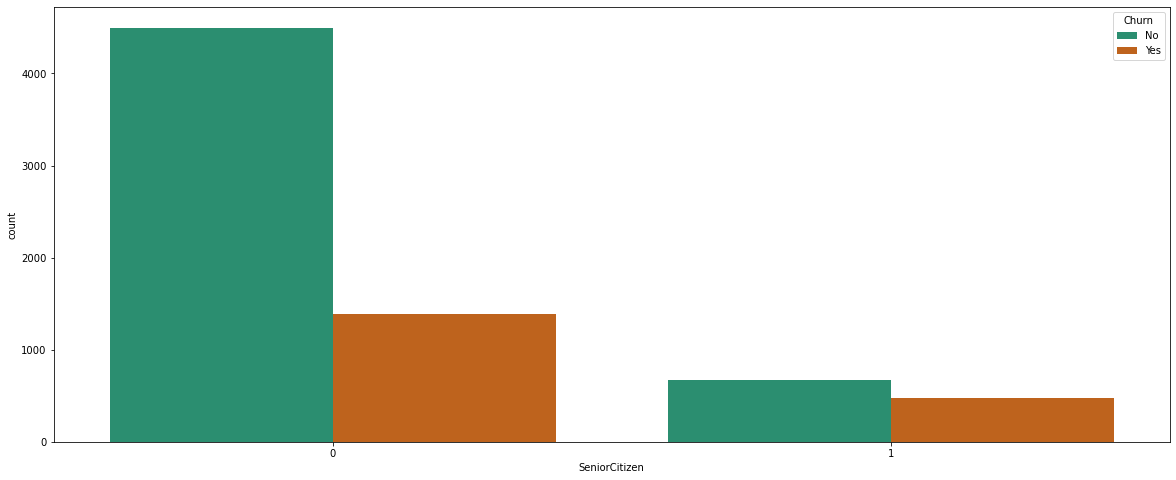

In [185]:
plt.figure(figsize=(20,8))
sns.countplot(df['SeniorCitizen'],hue=df['Churn'],palette='Dark2')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


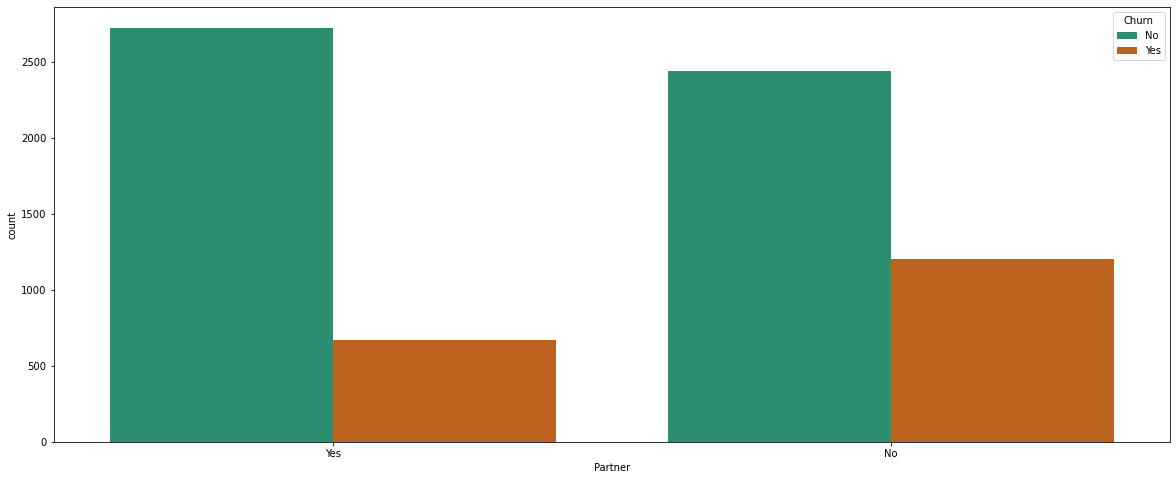

In [186]:
plt.figure(figsize=(20,8))
sns.countplot(df['Partner'],hue=df['Churn'],palette='Dark2')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


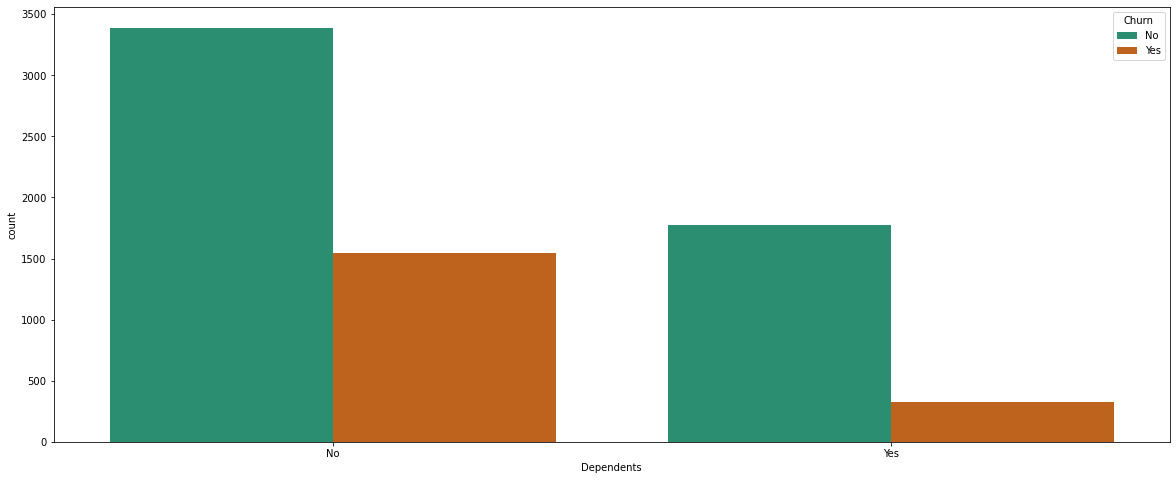

In [187]:
plt.figure(figsize=(20,8))
sns.countplot(df['Dependents'],hue=df['Churn'],palette='Dark2')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


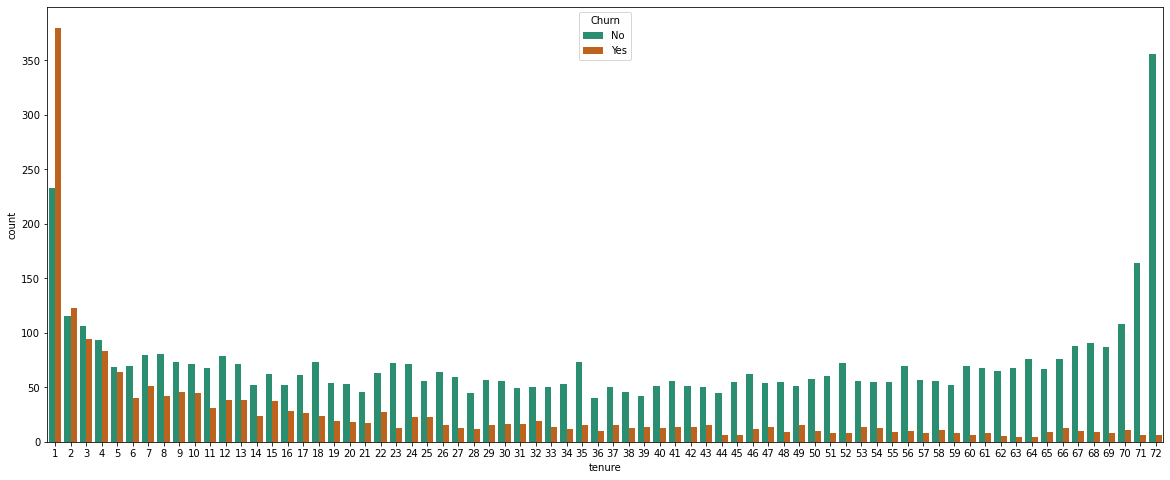

In [188]:
plt.figure(figsize=(20,8))
sns.countplot(df['tenure'],hue=df['Churn'],palette='Dark2')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


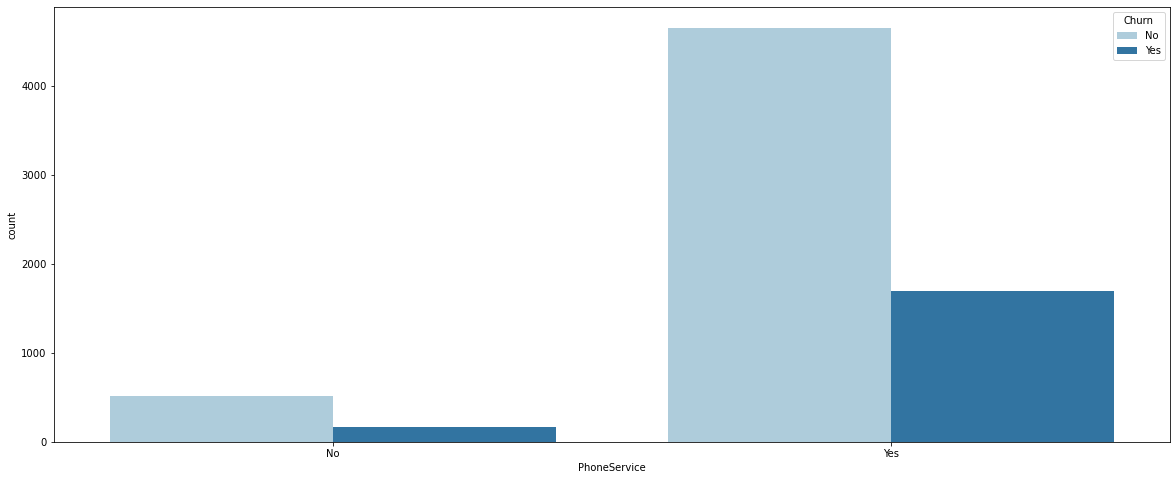

In [189]:
plt.figure(figsize=(20,8))
sns.countplot(df['PhoneService'],hue=df['Churn'],palette='Paired')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


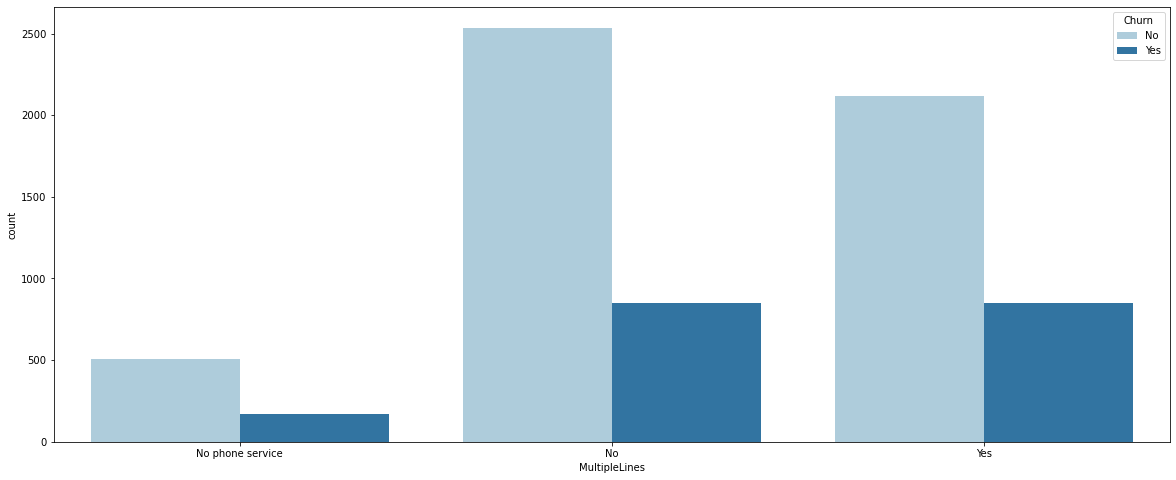

In [190]:
plt.figure(figsize=(20,8))
sns.countplot(df['MultipleLines'],hue=df['Churn'],palette='Paired')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


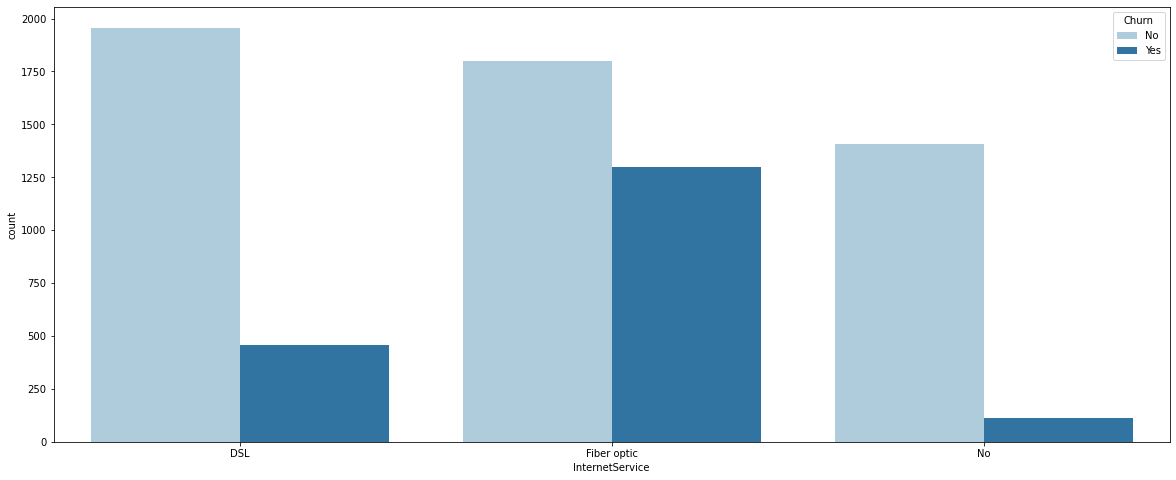

In [191]:
plt.figure(figsize=(20,8))
sns.countplot(df['InternetService'],hue=df['Churn'],palette='Paired')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


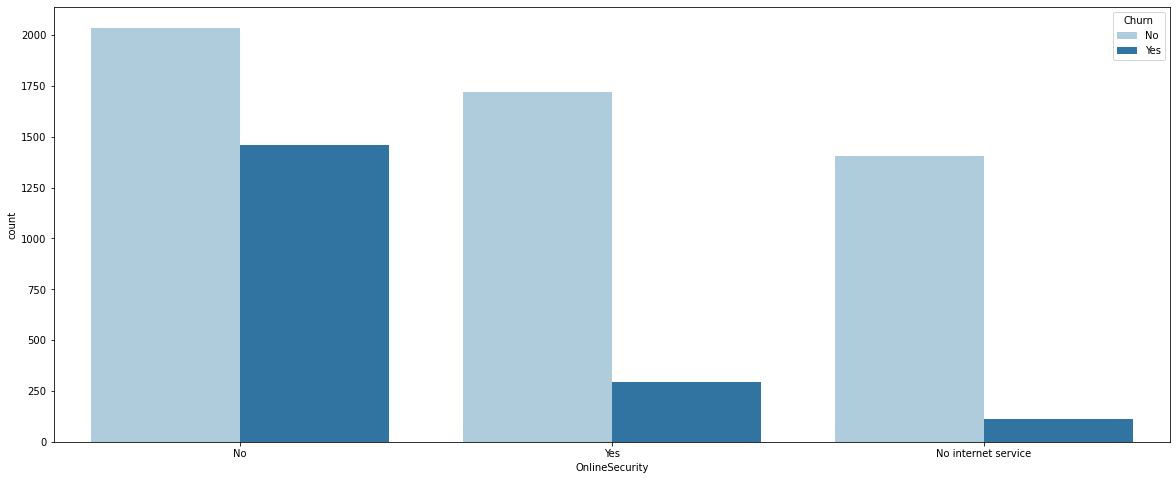

In [192]:
plt.figure(figsize=(20,8))
sns.countplot(df['OnlineSecurity'],hue=df['Churn'],palette='Paired')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


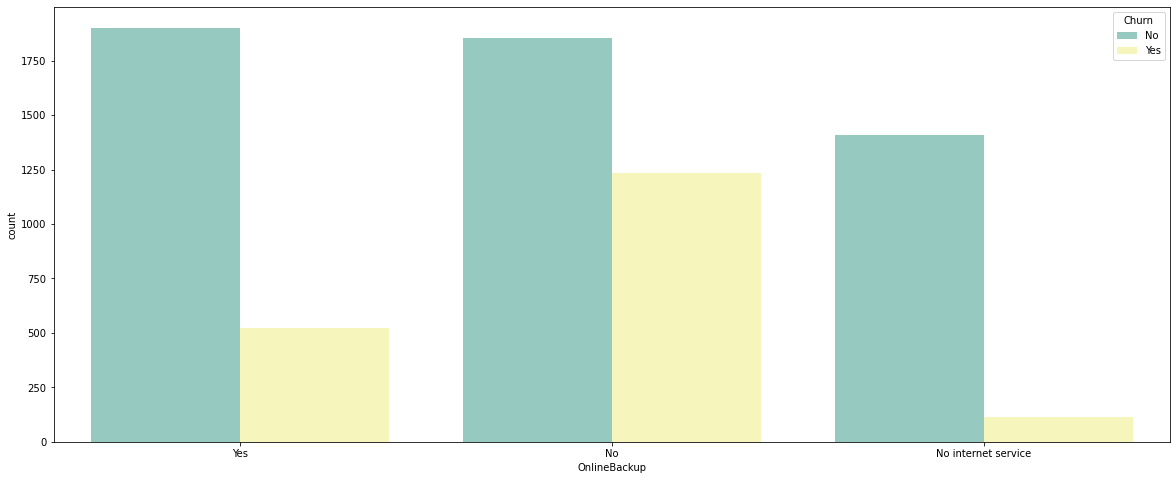

In [193]:
plt.figure(figsize=(20,8))
sns.countplot(df['OnlineBackup'],hue=df['Churn'],palette='Set3')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


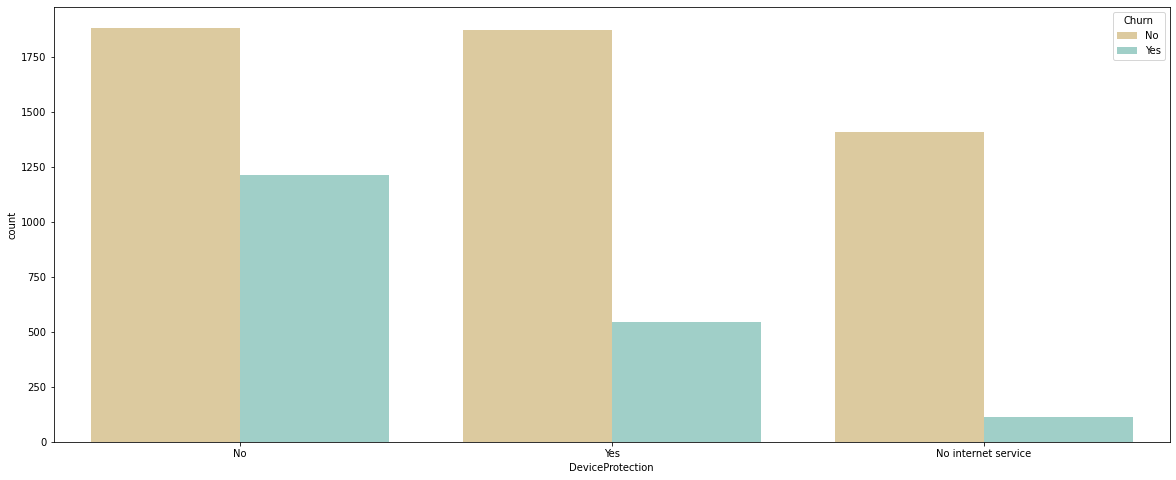

In [194]:
plt.figure(figsize=(20,8))
sns.countplot(df['DeviceProtection'],hue=df['Churn'],palette='BrBG')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


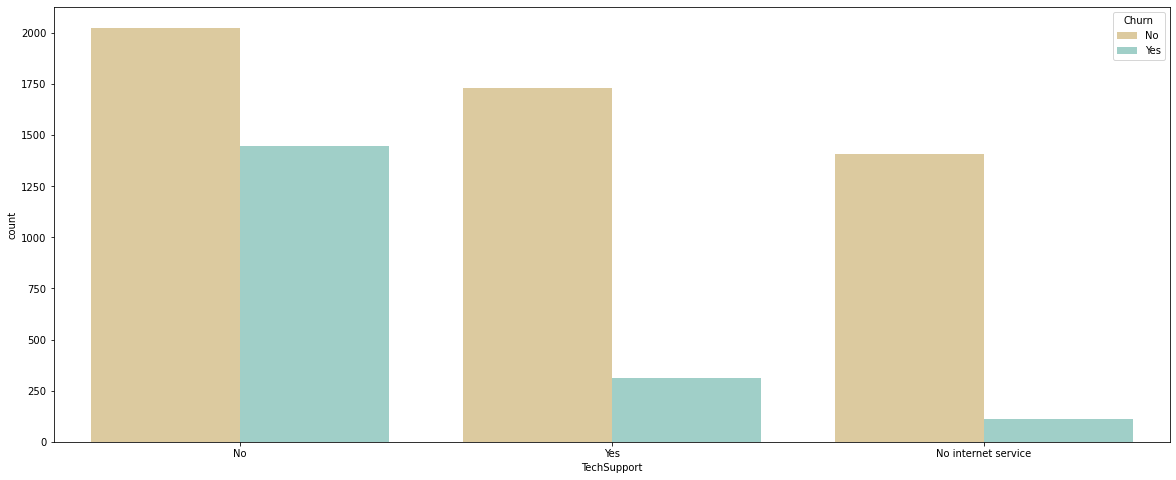

In [195]:
plt.figure(figsize=(20,8))
sns.countplot(df['TechSupport'],hue=df['Churn'],palette='BrBG')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


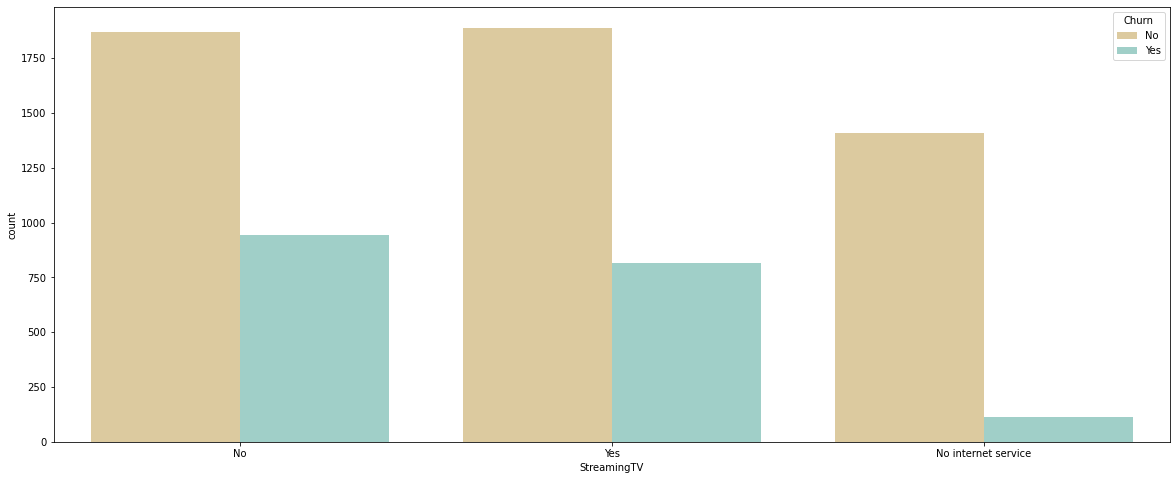

In [196]:
plt.figure(figsize=(20,8))
sns.countplot(df['StreamingTV'],hue=df['Churn'],palette='BrBG')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


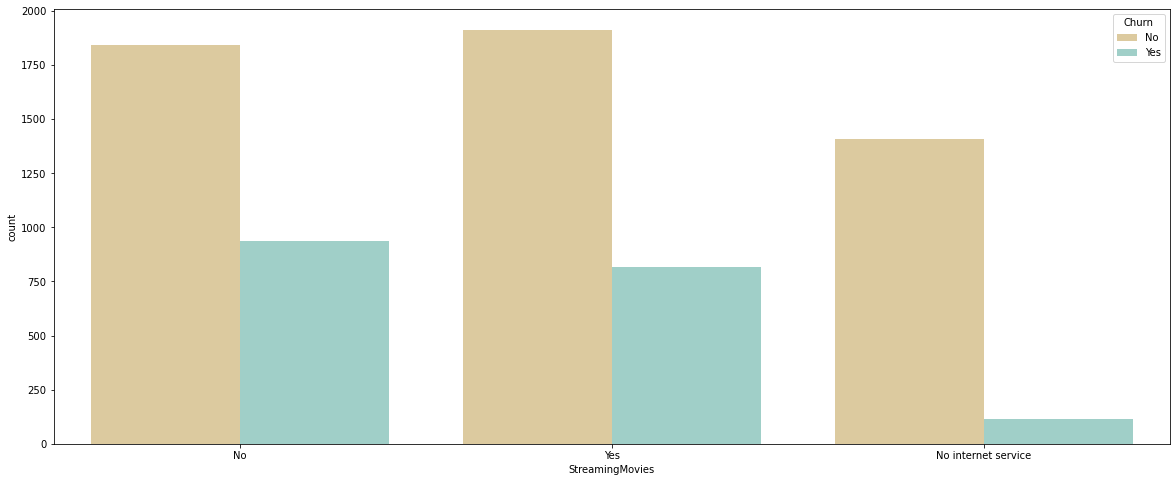

In [197]:
plt.figure(figsize=(20,8))
sns.countplot(df['StreamingMovies'],hue=df['Churn'],palette='BrBG')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


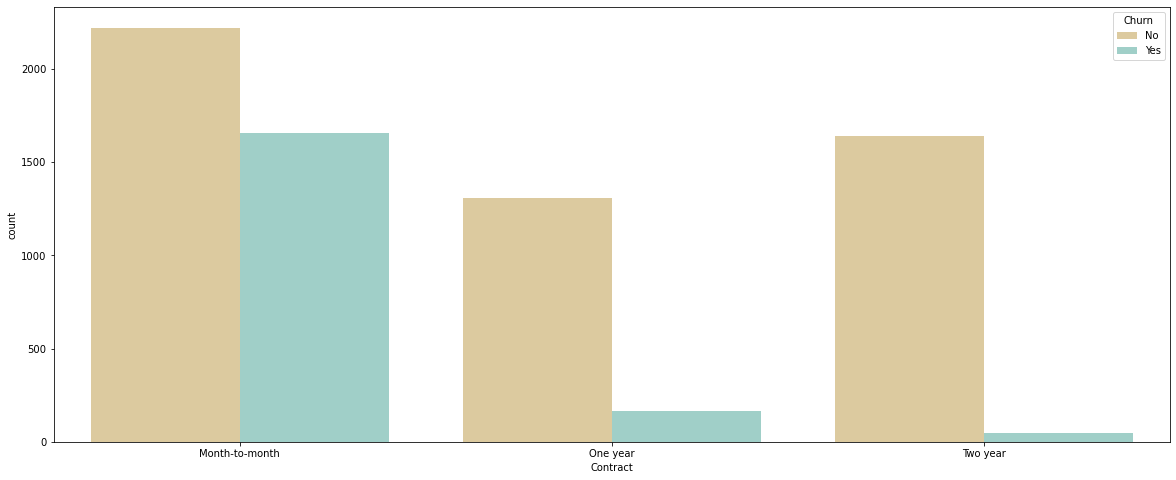

In [198]:
plt.figure(figsize=(20,8))
sns.countplot(df['Contract'],hue=df['Churn'],palette='BrBG')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


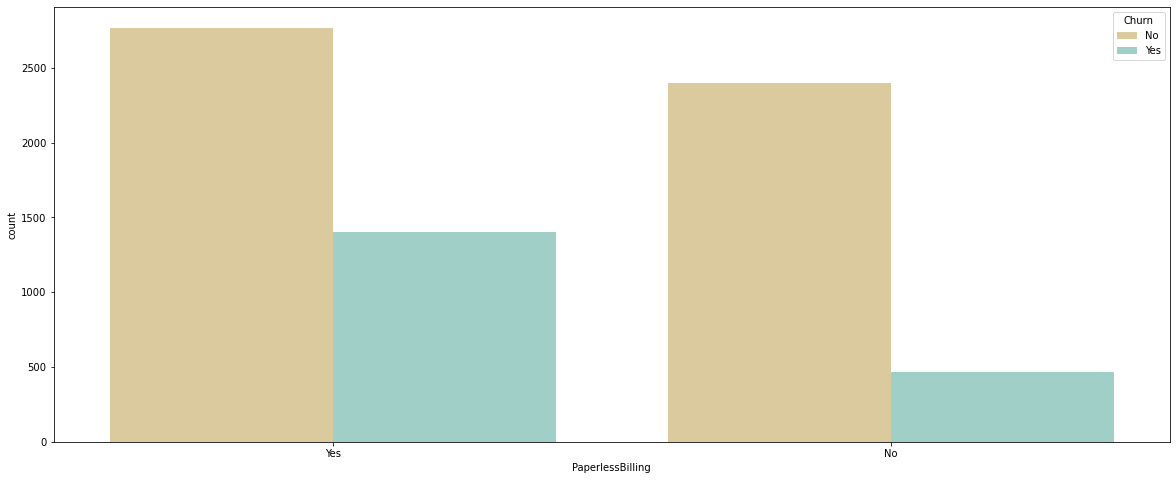

In [199]:
plt.figure(figsize=(20,8))
sns.countplot(df['PaperlessBilling'],hue=df['Churn'],palette='BrBG')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


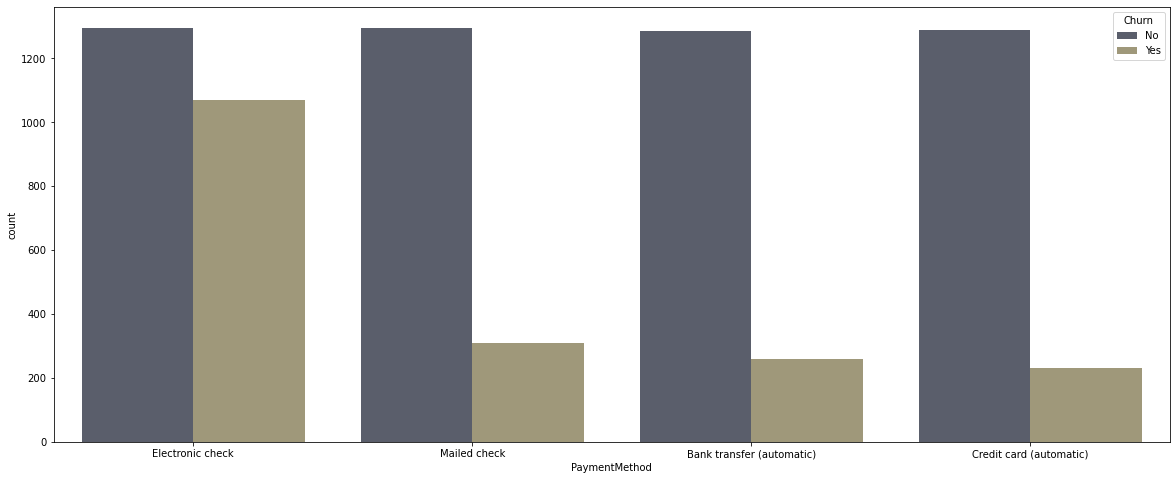

In [200]:
plt.figure(figsize=(20,8))
sns.countplot(df['PaymentMethod'],hue=df['Churn'],palette='cividis')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


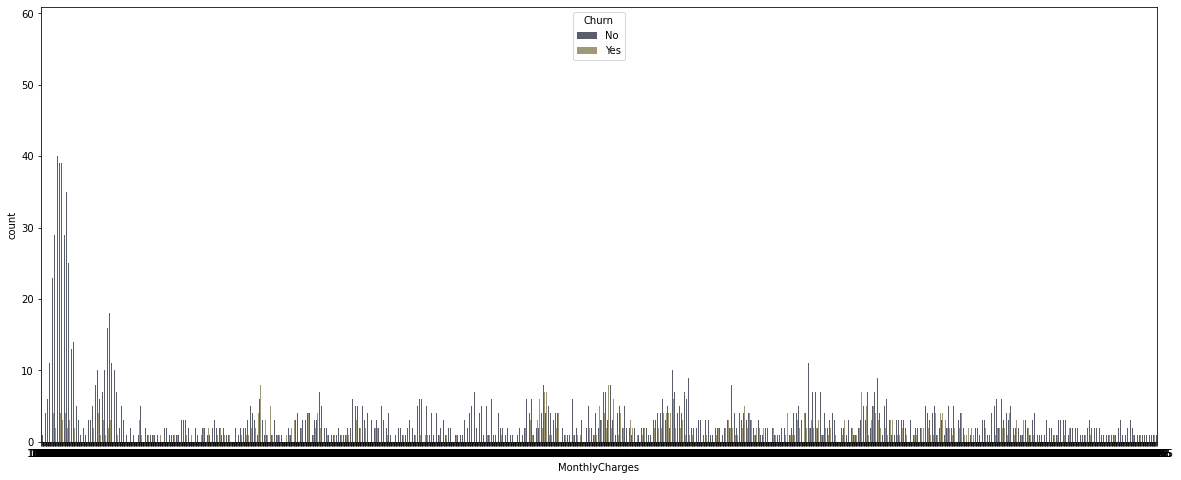

In [201]:
plt.figure(figsize=(20,8))
sns.countplot(df['MonthlyCharges'],hue=df['Churn'],palette='cividis')
plt.show()

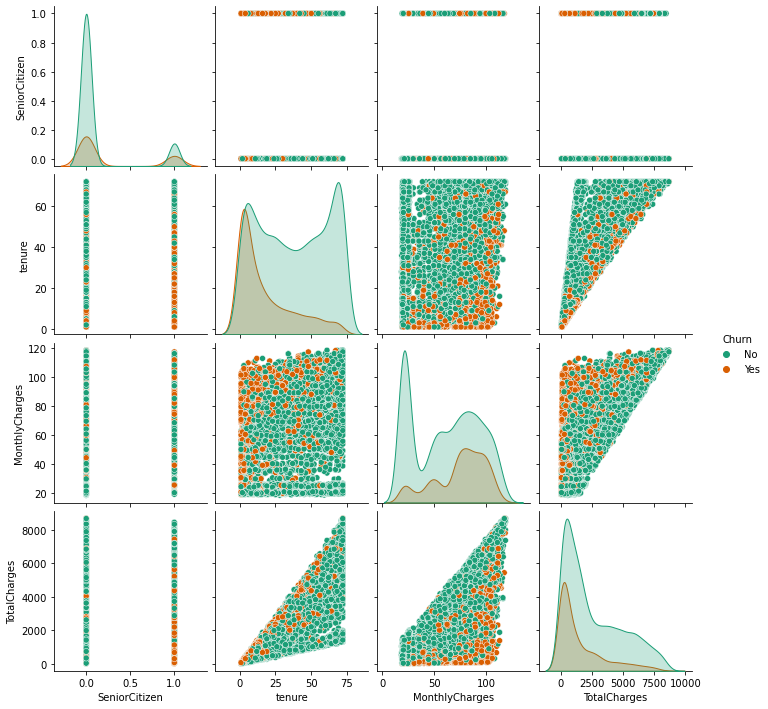

In [202]:
sns.pairplot(df,hue="Churn",palette="Dark2")
plt.show()

In [203]:
df_cat=[]

for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        df_cat.append(i)
print(df_cat)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [204]:
df_num=[]

for i in df.dtypes.index:
    if df.dtypes[i]=="int64"or df.dtypes[i]=="float64":
        df_num.append(i)
print(df_num)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

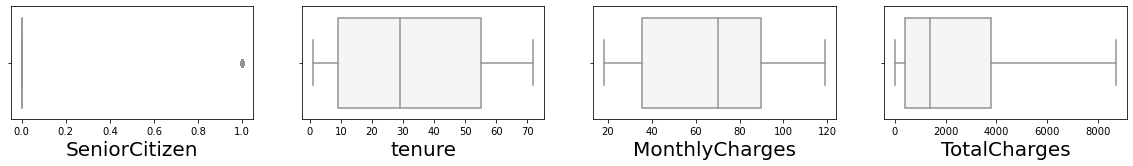

In [206]:
plt.figure(figsize=(20,12))
plotnumber=1

for i in df_num:
    if plotnumber<=6:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(df[i],palette='BrBG')
        plt.xlabel(i,fontsize=20)
        plt.yticks(rotation=90,fontsize=20)
    plotnumber+=1
plt.show()
        

Data have no outlier.

In [207]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
        
print(df)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0        0.0              0      1.0         0.0       1           0.0   
1        1.0              0      0.0         0.0      34           1.0   
2        1.0              0      0.0         0.0       2           1.0   
3        1.0              0      0.0         0.0      45           0.0   
4        0.0              0      0.0         0.0       2           1.0   
...      ...            ...      ...         ...     ...           ...   
7027     1.0              0      1.0         1.0      24           1.0   
7028     0.0              0      1.0         1.0      72           1.0   
7029     0.0              0      1.0         1.0      11           0.0   
7030     1.0              1      1.0         0.0       4           1.0   
7031     1.0              0      0.0         0.0      66           1.0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0               1.0              0.0     

In [208]:
df.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
Churn               1.060622
dtype: float64

In [209]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')

In [210]:
skew=['SeniorCitizen','TotalCharges']
df[skew]=pt.fit_transform(df[skew].values)

df.skew()


gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges       -0.144643
Churn               1.060622
dtype: float64

Skewness is removed from the numerical columns

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

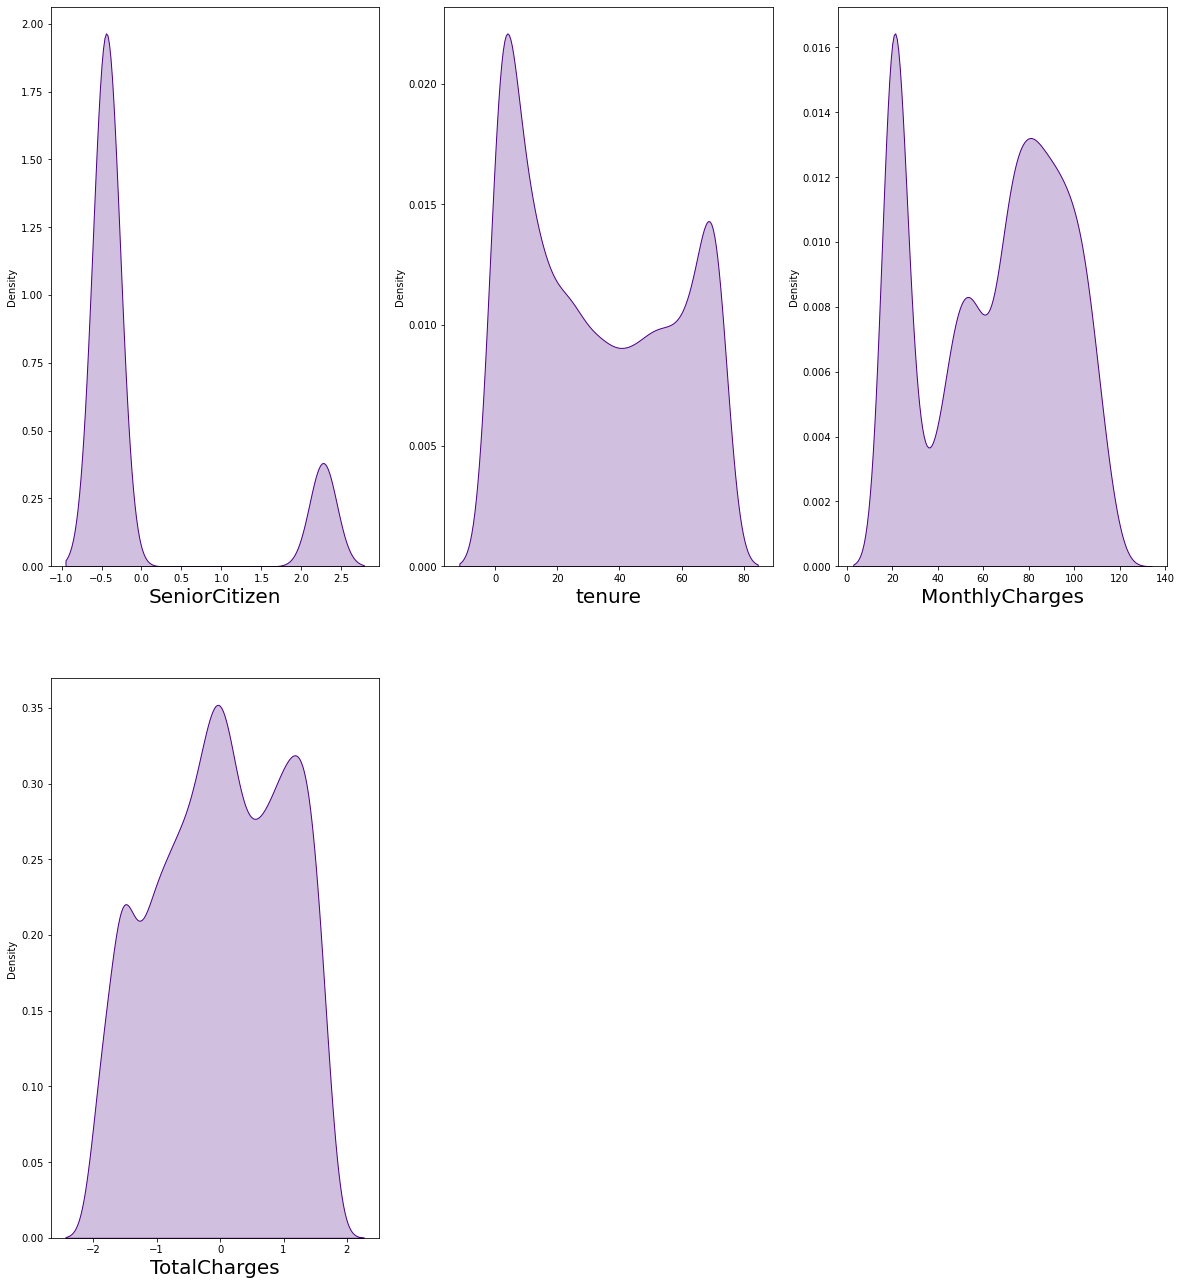

In [211]:
plt.figure(figsize=(20,35))
plotnumber=1

for i in df[df_num]:
    if plotnumber<=25:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[i],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()
    

<Figure size 1440x2880 with 0 Axes>

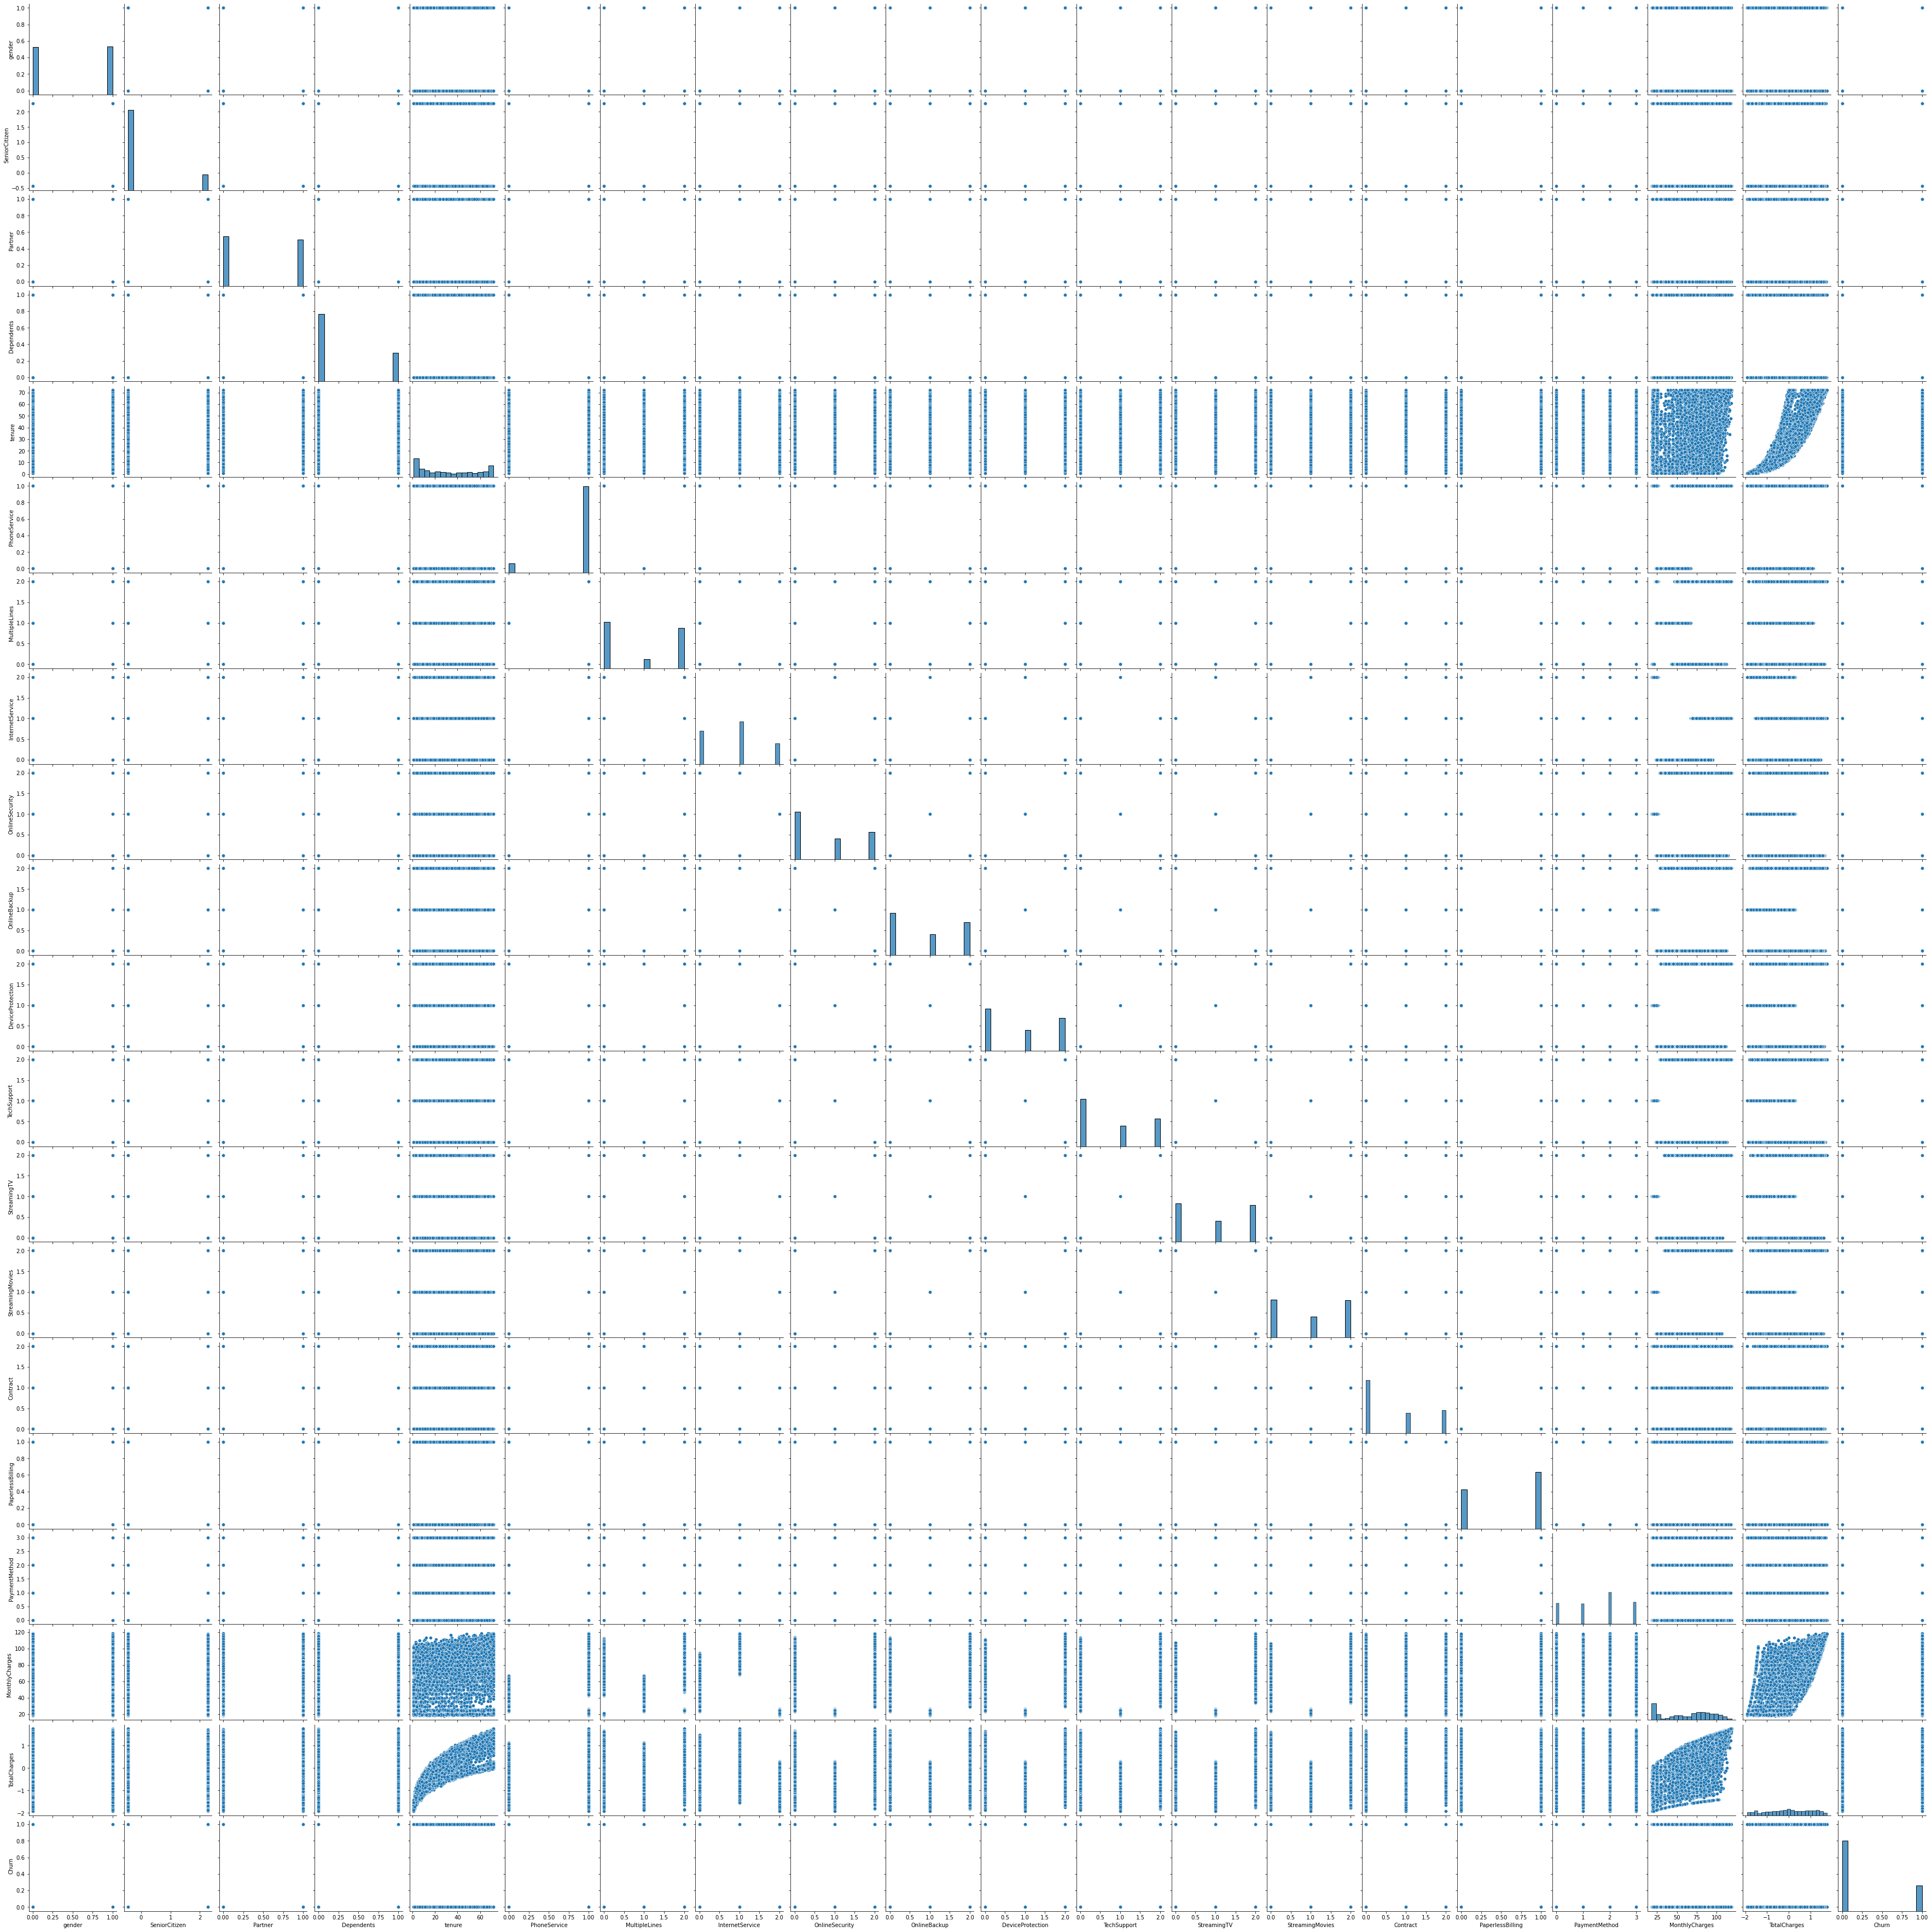

In [212]:
plt.figure(figsize=(20,40))
sns.pairplot(df,palette='Dark2')
plt.show()

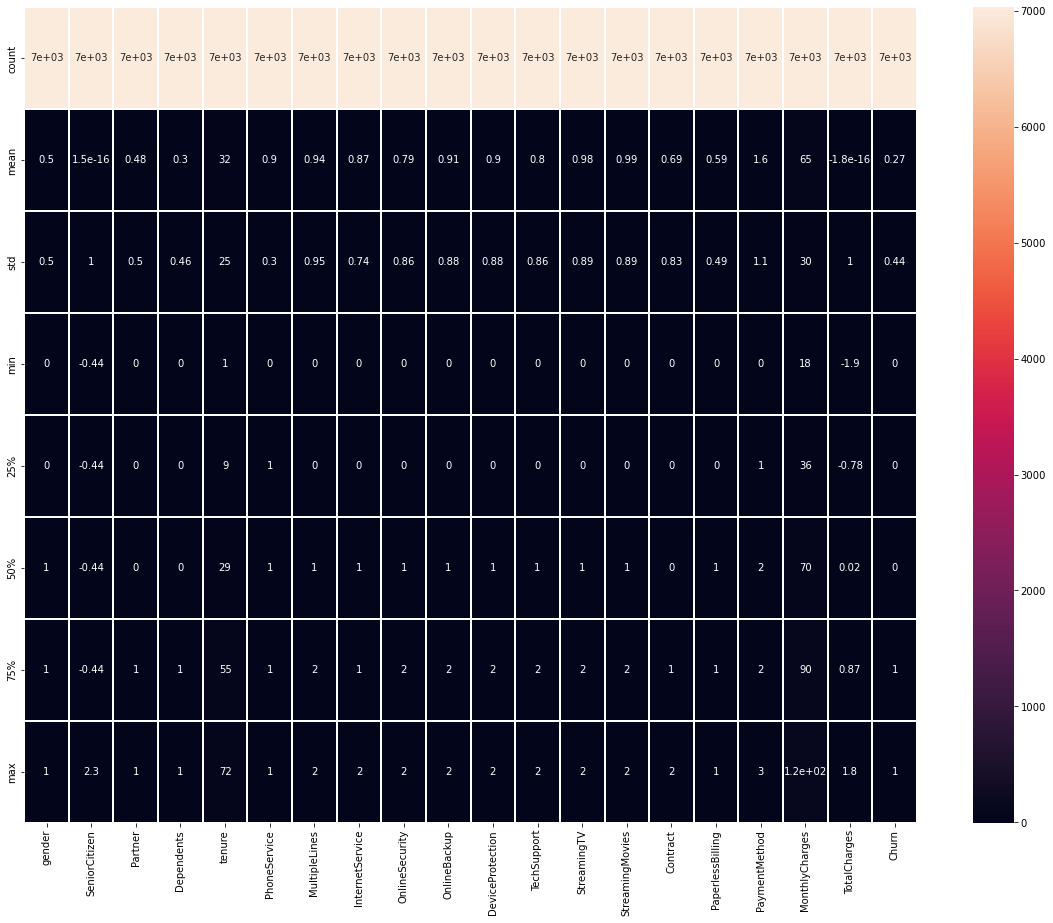

In [217]:
plt.figure(figsize=(20,15))
sns.heatmap(df.describe(),annot=True,linewidth=.2,fmt='.2g')
plt.show()

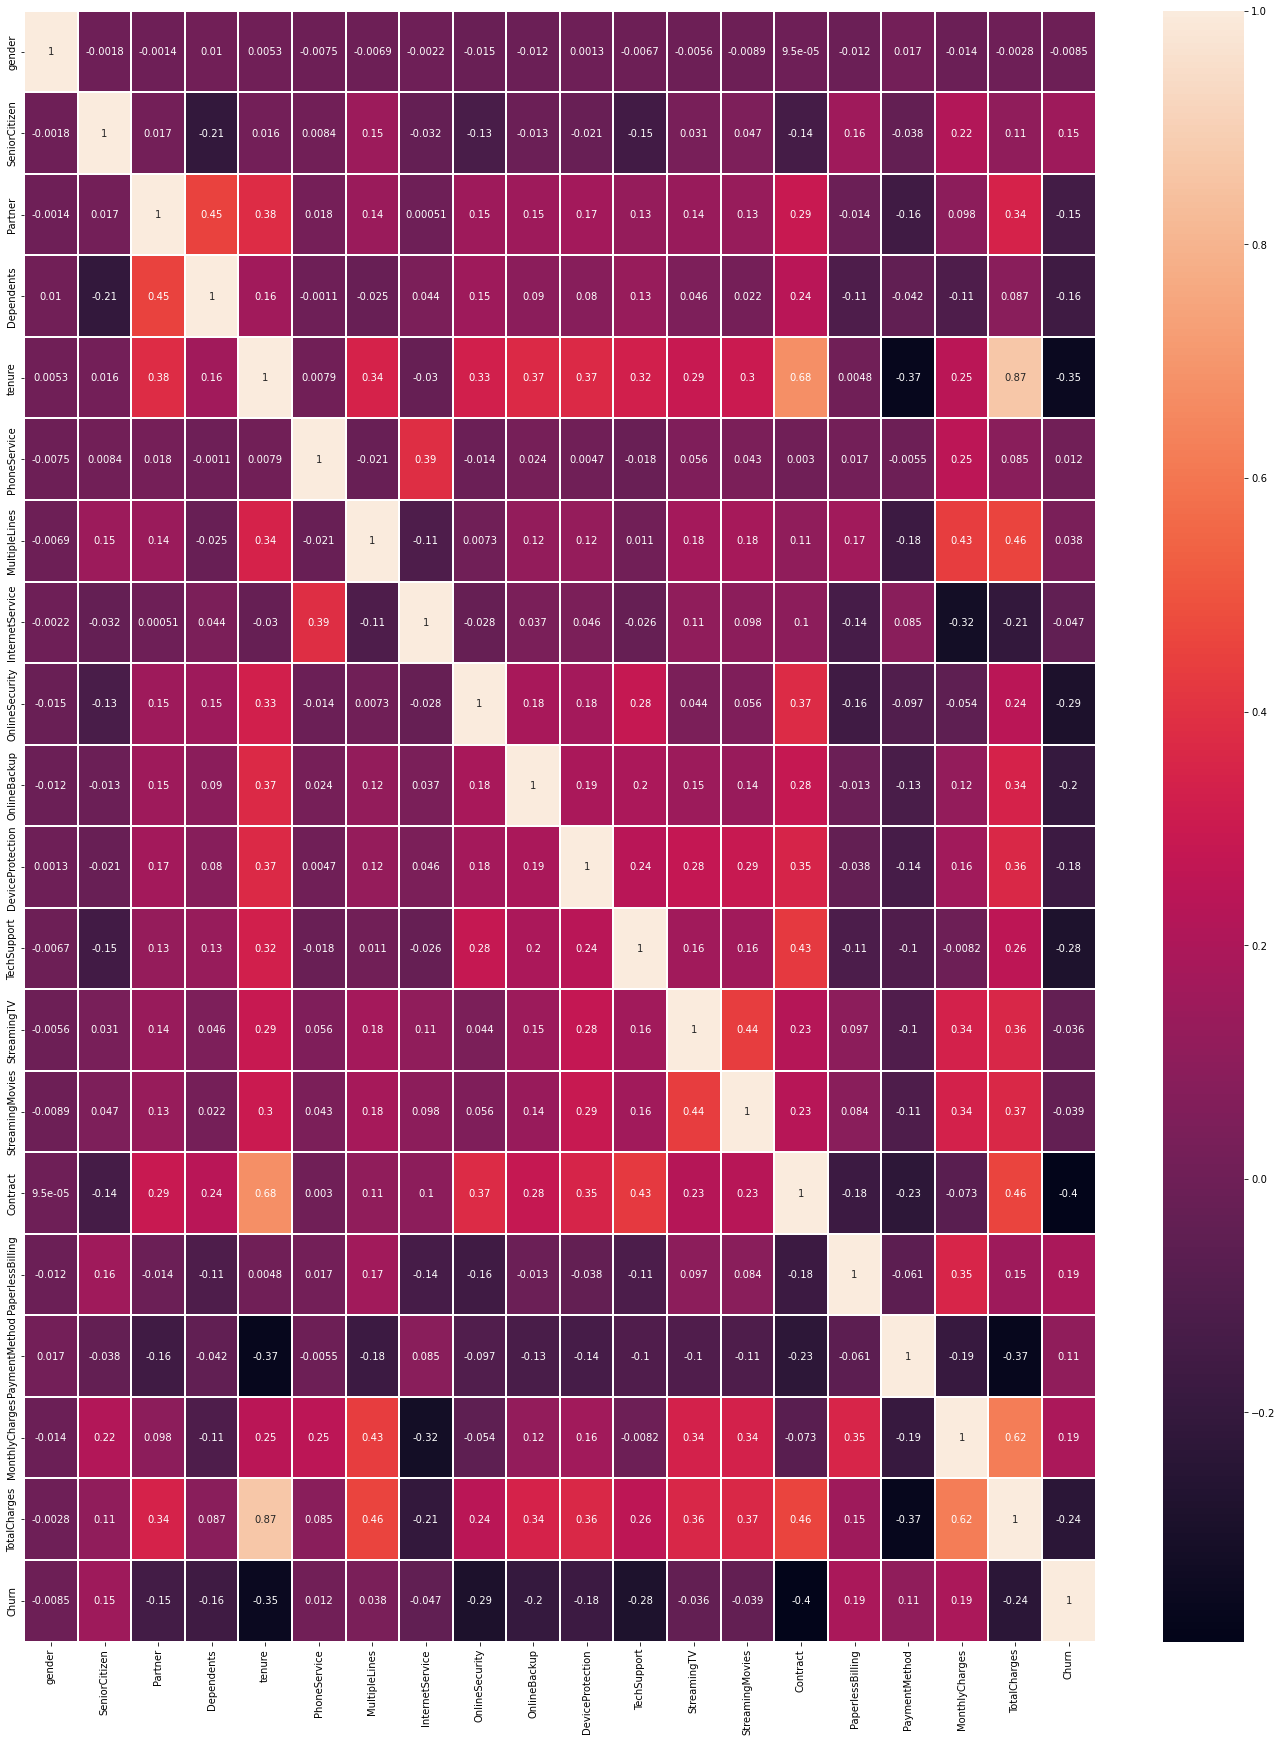

In [218]:
plt.figure(figsize=(24,30))
sns.heatmap(df.corr(),annot=True,linewidth=.2,fmt='.2g')
plt.show()

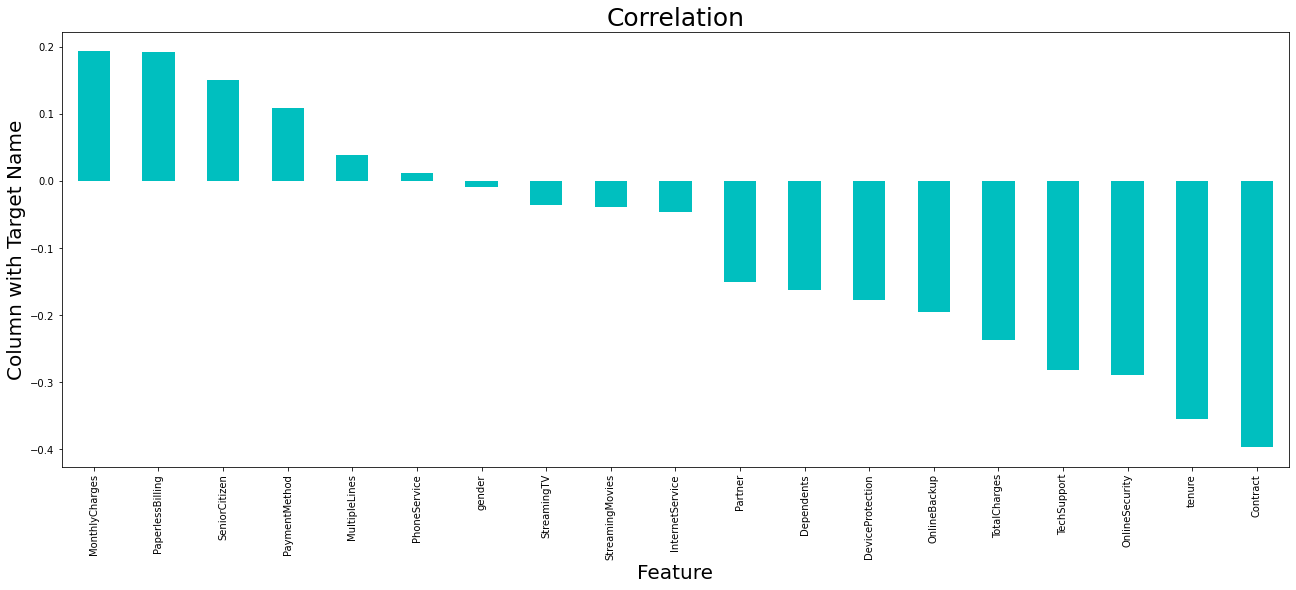

In [220]:
plt.figure(figsize=(22,8))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Column with Target Name', fontsize=20)
plt.title('Correlation',fontsize=25)
plt.show()

In [221]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,-0.002754,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.105781,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.344517,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.087047,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.867363,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.084649,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.459047,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.208185,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.242300,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.344086,-0.195290


Separating the Feature(x) and the Label(y).

In [224]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,-0.440327,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,-1.810069,0.0
1,1.0,-0.440327,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.254257,0.0
2,1.0,-0.440327,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.386091,1.0
3,1.0,-0.440327,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,0.233220,0.0
4,0.0,-0.440327,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.248808,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,-0.440327,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,0.296583,0.0
7028,0.0,-0.440327,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,1.565846,0.0
7029,0.0,-0.440327,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,-0.858393,0.0
7030,1.0,2.271039,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,-0.921477,1.0


In [225]:
x=df.drop('Churn',axis=1)
y=df['Churn']
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,-0.440327,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,-1.810069
1,1.0,-0.440327,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.254257
2,1.0,-0.440327,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.386091
3,1.0,-0.440327,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,0.233220
4,0.0,-0.440327,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.248808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,-0.440327,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,0.296583
7028,0.0,-0.440327,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,1.565846
7029,0.0,-0.440327,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,-0.858393
7030,1.0,2.271039,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,-0.921477


In [226]:
y.shape

(7032,)

In [227]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,0.062666,-1.183614,-0.917837,1.242875,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,-1.161694,-1.810069
1,0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.991564,-1.183614,1.408012,-1.028998,1.245441,-0.924267,-1.112632,-1.121501,0.373926,-1.206361,1.336636,-0.260878,0.254257
2,0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,-1.183614,1.408012,1.242875,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,1.336636,-0.363923,-1.386091
3,0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,0.062666,-1.183614,1.408012,-1.028998,1.245441,1.396963,-1.112632,-1.121501,0.373926,-1.206361,-1.473857,-0.747850,0.233220
4,-1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,0.172835,-0.917837,-1.028998,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,0.196178,-1.248808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.990658,-0.440327,1.035617,1.533025,-0.343137,0.327189,1.116896,-1.183614,1.408012,-1.028998,1.245441,1.396963,1.146689,1.137564,0.373926,0.828939,1.336636,0.664868,0.296583
7028,-1.009430,-0.440327,1.035617,1.533025,1.612573,0.327189,1.116896,0.172835,-0.917837,1.242875,1.245441,-0.924267,1.146689,1.137564,0.373926,0.828939,-0.537026,1.276493,1.565846
7029,-1.009430,-0.440327,1.035617,1.533025,-0.872808,-3.056334,0.062666,-1.183614,1.408012,-1.028998,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,-1.170004,-0.858393
7030,0.990658,2.271039,1.035617,-0.652305,-1.158016,0.327189,1.116896,0.172835,-0.917837,-1.028998,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,1.336636,0.319168,-0.921477


In [228]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=x.columns
vif['VIF']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

,Feature,VIF
0,gender,1.001687
1,SeniorCitizen,1.149521
2,Partner,1.462824
3,Dependents,1.380680
4,tenure,11.635668
5,PhoneService,1.622768
6,MultipleLines,1.398404
7,InternetService,1.868395
8,OnlineSecurity,1.252317
9,OnlineBackup,1.189089


Due to high multicolinearity(above 10) have to delete one of column from 'TotalCharges' and 'tenaure'. After deleting column from one of them, again check multicolinearity by VIF.

In [230]:
x.drop('TotalCharges',axis=1,inplace=True)

x  # now again check multicolinearity of whole dataframe to by vif method. 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,-1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,0.062666,-1.183614,-0.917837,1.242875,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,-1.161694
1,0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.991564,-1.183614,1.408012,-1.028998,1.245441,-0.924267,-1.112632,-1.121501,0.373926,-1.206361,1.336636,-0.260878
2,0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,-1.183614,1.408012,1.242875,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,1.336636,-0.363923
3,0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,0.062666,-1.183614,1.408012,-1.028998,1.245441,1.396963,-1.112632,-1.121501,0.373926,-1.206361,-1.473857,-0.747850
4,-1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,0.172835,-0.917837,-1.028998,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,0.196178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.990658,-0.440327,1.035617,1.533025,-0.343137,0.327189,1.116896,-1.183614,1.408012,-1.028998,1.245441,1.396963,1.146689,1.137564,0.373926,0.828939,1.336636,0.664868
7028,-1.009430,-0.440327,1.035617,1.533025,1.612573,0.327189,1.116896,0.172835,-0.917837,1.242875,1.245441,-0.924267,1.146689,1.137564,0.373926,0.828939,-0.537026,1.276493
7029,-1.009430,-0.440327,1.035617,1.533025,-0.872808,-3.056334,0.062666,-1.183614,1.408012,-1.028998,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,-1.170004
7030,0.990658,2.271039,1.035617,-0.652305,-1.158016,0.327189,1.116896,0.172835,-0.917837,-1.028998,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,1.336636,0.319168


In [231]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=x.columns
vif['VIF']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

,Feature,VIF
0,gender,1.001676
1,SeniorCitizen,1.149478
2,Partner,1.461064
3,Dependents,1.379226
4,tenure,2.798522
5,PhoneService,1.622539
6,MultipleLines,1.393720
7,InternetService,1.823433
8,OnlineSecurity,1.247630
9,OnlineBackup,1.186841


Now, no multicolinearty between the columns. get continue ahead.

In [232]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [233]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [234]:
x,y = sm.fit_resample(x,y)

In [235]:
y.value_counts()

0.0    5163
1.0    5163
Name: Churn, dtype: int64

Modelling: Find the best random state.

In [236]:
from sklearn.metrics import r2_score,accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    rfc = RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred = rfc.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at Random_state",maxRS)

Maximum r2 score is  0.45116738175598936 at Random_state 129


In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [239]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=129)

In [240]:
models=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),RandomForestClassifier(), ExtraTreesClassifier()]

def model_accuracy():
    for model in models:
       
    
        print(model)
        model.fit(x_train,y_train)
        model_predict=model.predict(x_test)
        print(accuracy_score(y_test,model_predict))
        print(confusion_matrix(y_test,model_predict))
        print(classification_report(y_test,model_predict))
        print(r2_score(y_test,model_predict))
        print(roc_auc_score(y_test,model_predict))
        print("-------------------------------------------------------------")


In [241]:
model_accuracy()

LogisticRegression()
0.7827630729502905
[[1165  404]
 [ 269 1260]]
              precision    recall  f1-score   support

         0.0       0.81      0.74      0.78      1569
         1.0       0.76      0.82      0.79      1529

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.78      3098
weighted avg       0.79      0.78      0.78      3098

0.13090740687477842
0.7832895859568212
-------------------------------------------------------------
DecisionTreeClassifier()
0.7924467398321497
[[1238  331]
 [ 312 1217]]
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79      1569
         1.0       0.79      0.80      0.79      1529

    accuracy                           0.79      3098
   macro avg       0.79      0.79      0.79      3098
weighted avg       0.79      0.79      0.79      3098

0.16964853286847326
0.7924913328506323
-------------------------------------------------------------
SVC()


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2

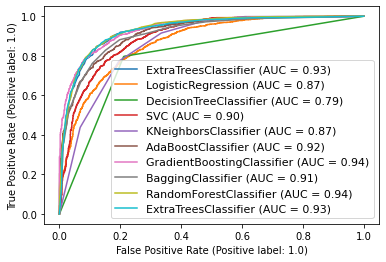

In [244]:
from sklearn.metrics import plot_roc_curve

dist=plot_roc_curve(ExtraTreesClassifier().fit(x_train,y_train),x_test,y_test)

for i in models:
    plot_roc_curve(i,x_test,y_test,ax=dist.ax_)
plt.legend(prop={'size':11}, loc= 'lower right')
plt.show()

Here best perfored Accuracy Score for prediction is 94%.

Save the model using joblib

In [249]:
r_model=RandomForestClassifier().fit(x_train,y_train)

In [250]:
import joblib
joblib.dump(r_model,'Customer_Churn_Analysis.pkl')

['Customer_Churn_Analysis.pkl']